# Fundamentos de Aprendizaje Automático
## _Práctica 2: K-NN y K-MEANS_
### _Grupo 1461_
#### _Rubén Torralba Manso y Alejandro Monterrubio Navarro_

Importes:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn as sk
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from abc import ABCMeta,abstractmethod
import numpy as np
from Datos import Datos
from Clasificador import *
from ClasificadorKNN import * 
import EstrategiaParticionado as EstrategiaParticionado
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from EstrategiaParticionado import ValidacionSimple as validacionSimple
from ClusteringKMeans import KMeans

Carga de datasets:

In [2]:
dataset1 = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
dataset2 = Datos('ConjuntosDatosP2/wdbc.csv')
dataset3 = Datos('ConjuntosDatosP2/iris.csv')

### Decisiones de diseño:

 A la hora de realizar el diseño, tomamos una decisión inicial que creíamos sería óptima, pero una vez realizada la práctica hemos llegado a la conclusión de que no así. La clase ideal para ubicar los métodos de normalización de los datos sería en la propia clase Datos. De esta forma, todas las operaciones que se hagan sobre un dataset, queda en la clase que se dedica a trabajar sobre este. El inconveniente que tiene ubicarlo en la clase Clasificador, que es como lo hemos hecho nosotros, es que cada vez que quieras normalizar los datos quedas supeditado a tener creado un objeto clasificador que seguramente ni necesites, quizá porque no estas clasificando y simplemente quieres normalizar datos de un dataset por otro motivo. Lo ideal es tener las operaciones sobre datos, en la clase Datos. Como nos hemos dado cuenta a posteriori, lo mantenemos así en nuestro código 

# Apartado 1: Algoritmo K-NN

Hacemos que el clasificador sea K-NN y cargo su dataset:

In [254]:
errores = []
NParticiones = 5
validacionSimple = EstrategiaParticionado.ValidacionSimple(10,NParticiones)
clasificador = ClasificadorKNN()

Vamos a estudiar el algoritmo para diferentes valores de K: 1,3,5,7... Estos valores deben ser impares para que no quepa lugar a posibles empates. Tras cada ejecución haremos alguna discusión sobre los resultados y finalmente trataremos de llegar a alguna conclusión después de discutir los resultados. 

### Pima-indians-diabetes:

Como no es el objetivo principal de esta práctica y para simplificar y acortar la valoración de los resultados, vamos a realizar todas las pruebas con una estrategia de particionado simple reservando un 10% para los índices de test, y con 5 particiones sobre los indices.

In [255]:
validacionSimple.creaParticiones(dataset1.datos)

## K = 1

#### Sin normalizar los datos:
Como bien sabemos, K-NN muestra un rendimiento de O(1) en una version óptima si no normalizamos los datos. Y de la forma en la que hemos realizado nuestra implementación no es necesario que el clasificador se guarde la información del dataset si este no se va a normalizar, por lo que no hemos visto necesario llamar al metodo entrenamiento si no queremos normalizar los valores del dataset.  

In [256]:
K = 1

In [257]:
errores = []
for j in range(3):
    validacionSimple.creaParticiones(dataset1.datos)
    for i in range(NParticiones):
    
        predicciones = clasificador.clasifica(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset1.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset1.nominalAtributos,K)
    
        error = clasificador.error(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

        errores.append(error) 

In [258]:
err_diabetes_k1 = f'{np.mean(errores) * 100:.2f}%'
print(f'El error para K = 1 sin normalizar los datos es: {np.mean(errores) * 100:.2f}%')

El error para K = 1 sin normalizar los datos es: 31.05%


#### Normalizando los datos:

In [259]:
errores = []
for j in range(3):
    dataset1 = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
    validacionSimple.creaParticiones(dataset1.datos)
    dataset1.datos = clasificador.entrenamiento(dataset1.datos, dataset1.nominalAtributos)

    for i in range(NParticiones):
    
        predicciones = clasificador.clasifica(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset1.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset1.nominalAtributos,K)
    
        error = clasificador.error(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

        errores.append(error) 

In [260]:
err_diabetes_k1_norm = f'{np.mean(errores) * 100:.2f}%'
print(f'El error para K = 1 con los datos normalizados es: {np.mean(errores) * 100:.2f}%')

El error para K = 1 con los datos normalizados es: 28.68%


Es evidente que no nos podemos fiar de los resultados con un valor de K = 1. En este caso, el algoritmo depende únicamente del orden en el que se hayan estudiado los distintos patrones respecto al resto y no por el numero de vecinos dentro de una zona. Por lo tanto el valor de la predicción para este caso no es valido. 

Pasemos a estudiar el algoritmo para valores de K validos

### K = 3:

#### Sin normalizar los datos:

In [261]:
dataset1 = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
K = 3

In [262]:
errores = []
for j in range(3):
    validacionSimple.creaParticiones(dataset1.datos)

    for i in range(NParticiones):

        predicciones = clasificador.clasifica(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset1.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset1.nominalAtributos,K)

        error = clasificador.error(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

        errores.append(error) 

In [263]:
err_diabetes_k3 = f'{np.mean(errores) * 100:.2f}%'
print(f'El error para el dataset sin normalizar y un valor de K = 3 es: {np.mean(errores) * 100:.2f}%')

El error para el dataset sin normalizar y un valor de K = 3 es: 28.68%


Sin duda, el algoritmo no muestra un buen porcentaje de acierto para este dataset en concreto, al menos sin normalizar los datos, veamos si los normalizamos..

#### Normalizando los datos:

In [264]:
errores = []

for j in range(3):
    dataset1 = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
    validacionSimple.creaParticiones(dataset1.datos)
    dataset1.datos = clasificador.entrenamiento(dataset1.datos, dataset1.nominalAtributos)
    for i in range(NParticiones):
    
        predicciones = clasificador.clasifica(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset1.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset1.nominalAtributos,K)
    
        error = clasificador.error(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

        errores.append(error) 

In [265]:
err_diabetes_k3_norm = f'{np.mean(errores) * 100:.2f}%'
print(f'El error para valores normalizados y un valor de K = 3 {np.mean(errores) * 100:.2f}%')

El error para valores normalizados y un valor de K = 3 25.53%


Observamos que si normalizamos los datos el dataset gana algo más de 3 puntos de fiabilidad respecto al mismo sin normalizar. Observando el csv apreciamos que los campos tienen gran diferencia entre ellos. Algunos son valores extremadamente pequeños y otros son grandes. Lo que hace que pueden representar diferentes pesos e influenciar negativamente sobre los calculos si no los normalizamos, de aquí esta mejora. 

### K = 5:

#### Sin normalizar los datos:

In [267]:
dataset1 = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
K = 5

In [268]:
errores = []
for j in range(3):
    validacionSimple.creaParticiones(dataset1.datos)

    for i in range(NParticiones):
    
        predicciones = clasificador.clasifica(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset1.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset1.nominalAtributos,K)
    
        error = clasificador.error(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

        errores.append(error) 

In [269]:
err_diabetes_k5 = f'{np.mean(errores) * 100:.2f}%'
print(f'El error para los datos sin normalizar y valor de K = 5: {np.mean(errores) * 100:.2f}%')

El error para los datos sin normalizar y valor de K = 5: 27.28%


#### Normalizando los datos:

In [270]:
errores = []
for j in range(3):
    dataset1 = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
    validacionSimple.creaParticiones(dataset1.datos)
    dataset1.datos = clasificador.entrenamiento(dataset1.datos, dataset1.nominalAtributos)
    for i in range(NParticiones):
    
        predicciones = clasificador.clasifica(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset1.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset1.nominalAtributos,K)
    
        error = clasificador.error(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

        errores.append(error) 

In [271]:
err_diabetes_k5_norm = f'{np.mean(errores) * 100:.2f}%'
print(f'El error para K = 5 y los datos normalizados: {np.mean(errores) * 100:.2f}%')

El error para K = 5 y los datos normalizados: 24.91%


### K = 11:

#### Sin normalizar los datos:

In [279]:
dataset1 = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
K = 11

In [280]:
errores = []
for j in range(3):
    validacionSimple.creaParticiones(dataset1.datos)

    for i in range(NParticiones):
    
        predicciones = clasificador.clasifica(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset1.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset1.nominalAtributos,K)

        error = clasificador.error(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

        errores.append(error) 

In [281]:
err_diabetes_k11 = f'{np.mean(errores) * 100:.2f}%'
print(f'El error para los datos sin normalizar y valor de K = 11: {np.mean(errores) * 100:.2f}%')

El error para los datos sin normalizar y valor de K = 11: 27.37%


#### Normalizando los datos:

In [282]:
errores = []
for j in range(3):
    dataset1 = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
    validacionSimple.creaParticiones(dataset1.datos)
    dataset1.datos = clasificador.entrenamiento(dataset1.datos, dataset1.nominalAtributos)
    for i in range(NParticiones):
    
        predicciones = clasificador.clasifica(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset1.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset1.nominalAtributos,K)

        error = clasificador.error(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

        errores.append(error) 

In [283]:
err_diabetes_k11_norm = f'{np.mean(errores) * 100:.2f}%'
print(f'El error para K = 11 y los datos normalizados: {np.mean(errores) * 100:.2f}%')

El error para K = 11 y los datos normalizados: 25.35%


Vemos que, aumentar el valor de K, mejora los resultados unicamente en el dataset normalizado. Esto se debe a que los valores del dataset original resulta en cálculos algo imprecisos y resultados poco fiables. Recalcar que se debe a las caracterisicas de este dataset en particular. Luego veremos que con wdbc no sucede lo mismo

### K = 21:

#### Sin normalizar los datos:

In [284]:
dataset1 = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
K = 21

In [285]:
errores = []
for j in range(3):
    validacionSimple.creaParticiones(dataset1.datos)
    
    for i in range(NParticiones):
    
        predicciones = clasificador.clasifica(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset1.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset1.nominalAtributos,K)
    
        error = clasificador.error(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

        errores.append(error) 

In [286]:
err_diabetes_k21 = f'{np.mean(errores) * 100:.2f}%'
print(f'El error para los datos sin normalizar y valor de K = 21: {np.mean(errores) * 100:.2f}%')

El error para los datos sin normalizar y valor de K = 21: 23.16%


#### Normalizando los datos:

In [287]:
dataset1.datos = clasificador.entrenamiento(dataset1.datos, dataset1.nominalAtributos)

In [288]:
errores = []
for j in range(3):
    dataset1 = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
    validacionSimple.creaParticiones(dataset1.datos)
    dataset1.datos = clasificador.entrenamiento(dataset1.datos, dataset1.nominalAtributos)
    for i in range(NParticiones):
    
        predicciones = clasificador.clasifica(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset1.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset1.nominalAtributos,K)
    
        error = clasificador.error(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

        errores.append(error) 

In [289]:
err_diabetes_k21_norm = f'{np.mean(errores) * 100:.2f}%'
print(f'El error para K = 21 y los datos normalizados: {np.mean(errores) * 100:.2f}%')

El error para K = 21 y los datos normalizados: 23.68%


In [290]:
print('K = 1:')
print('Error para diabetes k=1: ' + err_diabetes_k1)
print('Error para diabetes k=1 normalizado: ' + err_diabetes_k1_norm)
print('\nK = 3:')
print('Error para diabetes k=3: ' + err_diabetes_k3)
print('Error para diabetes k=3 normalizado: ' + err_diabetes_k3_norm)
print('\nK = 5:')
print('Error para diabetes k=5: ' + err_diabetes_k5)
print('Error para diabetes k=5 normalizado: ' + err_diabetes_k5_norm)
print('\nK = 11:')
print('Error para diabetes k=11: ' + err_diabetes_k11)
print('Error para diabetes k=11 normalizado: ' + err_diabetes_k11_norm)
print('\nK = 21:')
print('Error para diabetes k=21: ' + err_diabetes_k21)
print('Error para diabetes k=21 normalizado: ' + err_diabetes_k21_norm)

K = 1:
Error para diabetes k=1: 31.05%
Error para diabetes k=1 normalizado: 28.68%

K = 3:
Error para diabetes k=3: 28.68%
Error para diabetes k=3 normalizado: 25.53%

K = 5:
Error para diabetes k=5: 27.28%
Error para diabetes k=5 normalizado: 24.91%

K = 11:
Error para diabetes k=11: 27.37%
Error para diabetes k=11 normalizado: 25.35%

K = 21:
Error para diabetes k=21: 23.16%
Error para diabetes k=21 normalizado: 23.68%


Apreciamos que los valores del dataset normalizado mejoran algo respecto a este mismo sin normalizar. Además, como ya hemos comentado, los valores de k=1 son despreciables y no nos sirven como solución. Resulta complejo sacar algún tipo de conclusión respecto al k optimo. Si podemos apreciar cierta tendencia a la baja en los resultados sin normalizar, pero un comportamiento poco destacable en los resultados normalizados.

## Wdbc

### K = 1,3,5,11,21:

En este caso, vamos a ser algo menos descriptivos con el proceso y si más incisivos con la comparación de los resultados. 


In [304]:

dataset2 = Datos('ConjuntosDatosP2/wdbc.csv')

K = 1
errores1 = []
for j in range(3):
    validacionSimple.creaParticiones(dataset2.datos)
    for i in range(NParticiones):
    
        predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
        error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

        errores1.append(error) 

dataset2.datos = clasificador.entrenamiento(dataset2.datos, dataset2.nominalAtributos)

errores1Norm = []    
for j in range(3):
    dataset2 = Datos('ConjuntosDatosP2/wdbc.csv')
    validacionSimple.creaParticiones(dataset2.datos)
    dataset2.datos = clasificador.entrenamiento(dataset2.datos, dataset2.nominalAtributos)
    for i in range(NParticiones):
    
        predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
        error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

        errores1Norm.append(error) 
    
dataset2 = Datos('ConjuntosDatosP2/wdbc.csv')
K = 3

errores3 = []
for j in range(3):
    validacionSimple.creaParticiones(dataset2.datos)
    for i in range(NParticiones):
    
        predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
        error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

        errores3.append(error) 
        
errores3Norm = []
for j in range(3):
    dataset2 = Datos('ConjuntosDatosP2/wdbc.csv')
    validacionSimple.creaParticiones(dataset2.datos)
    dataset2.datos = clasificador.entrenamiento(dataset2.datos, dataset2.nominalAtributos)
    for i in range(NParticiones):
    
        predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
        error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

        errores3Norm.append(error) 
    

dataset2 = Datos('ConjuntosDatosP2/wdbc.csv')
K = 5

errores5 = []
for j in range(3):
    validacionSimple.creaParticiones(dataset2.datos)
    for i in range(NParticiones):
    
        predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
        error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

        errores5.append(error) 

        
errores5Norm = []
for j in range(3):
    dataset2 = Datos('ConjuntosDatosP2/wdbc.csv')
    validacionSimple.creaParticiones(dataset2.datos)
    dataset2.datos = clasificador.entrenamiento(dataset2.datos, dataset2.nominalAtributos)
    for i in range(NParticiones):
    
        predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
        error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

        errores5Norm.append(error) 
    

dataset2 = Datos('ConjuntosDatosP2/wdbc.csv')
K = 11

errores11 = []
for j in range(3):
    validacionSimple.creaParticiones(dataset2.datos)
    for i in range(NParticiones):
    
        predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
        error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

        errores11.append(error) 

errores11Norm = []
for j in range(3):
    dataset2 = Datos('ConjuntosDatosP2/wdbc.csv')
    validacionSimple.creaParticiones(dataset2.datos)
    dataset2.datos = clasificador.entrenamiento(dataset2.datos, dataset2.nominalAtributos)
    for i in range(NParticiones):
    
        predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
        error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

        errores11Norm.append(error) 

    
dataset2 = Datos('ConjuntosDatosP2/wdbc.csv')
K = 21

errores21 = []
for j in range(3):
    validacionSimple.creaParticiones(dataset2.datos)
    for i in range(NParticiones):
    
        predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
        error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

        errores21.append(error) 

errores21Norm = []
for j in range(3):
    dataset2 = Datos('ConjuntosDatosP2/wdbc.csv')
    validacionSimple.creaParticiones(dataset2.datos)
    dataset2.datos = clasificador.entrenamiento(dataset2.datos, dataset2.nominalAtributos)
    for i in range(NParticiones):
    
        predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
        error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

        errores21Norm.append(error) 
    

In [305]:
err_wdbc_k1 = f'{np.mean(errores1) * 100:.2f}%'
print(f'{np.mean(errores1) * 100:.2f}%')

7.86%


In [306]:
err_wdbc_k1_norm = f'{np.mean(errores1Norm) * 100:.2f}%'
print(f'{np.mean(errores1Norm) * 100:.2f}%')

5.60%


In [307]:
err_wdbc_k3 = f'{np.mean(errores3) * 100:.2f}%'
print(f'{np.mean(errores3) * 100:.2f}%')

5.48%


In [308]:
err_wdbc_k3_norm = f'{np.mean(errores3Norm) * 100:.2f}%'
print(f'{np.mean(errores3Norm) * 100:.2f}%')

3.57%


In [309]:
err_wdbc_k5 = f'{np.mean(errores5) * 100:.2f}%'
print(f'{np.mean(errores5) * 100:.2f}%')

6.07%


In [310]:
err_wdbc_k5_norm = f'{np.mean(errores5Norm) * 100:.2f}%'
print(f'{np.mean(errores5Norm) * 100:.2f}%')

2.74%


In [311]:
err_wdbc_k11 = f'{np.mean(errores11) * 100:.2f}%'
print(f'{np.mean(errores11) * 100:.2f}%')

7.02%


In [312]:
err_wdbc_k11_norm = f'{np.mean(errores11Norm) * 100:.2f}%'
print(f'{np.mean(errores11Norm) * 100:.2f}%')

3.33%


In [313]:
err_wdbc_k21 = f'{np.mean(errores21) * 100:.2f}%'
print(f'{np.mean(errores21) * 100:.2f}%')

7.02%


In [314]:
err_wdbc_k21_norm = f'{np.mean(errores21Norm) * 100:.2f}%'
print(f'{np.mean(errores21Norm) * 100:.2f}%')

5.12%


In [315]:
print('K = 1:')
print('Error para wdbc k=1: ' + err_wdbc_k1)
print('Error para wdbc k=1 normalizado: ' + err_wdbc_k1_norm)
print('\nK = 3:')
print('Error para wdbc k=3: ' + err_wdbc_k3)
print('Error para wdbc k=3 normalizado: ' + err_wdbc_k3_norm)
print('\nK = 5:')
print('Error para wdbc k=5: ' + err_wdbc_k5)
print('Error para wdbc k=5 normalizado: ' + err_wdbc_k5_norm)
print('\nK = 11:')
print('Error para wdbc k=11: ' + err_wdbc_k11)
print('Error para wdbc k=11 normalizado: ' + err_wdbc_k11_norm)
print('\nK = 21:')
print('Error para wdbc k=21: ' + err_wdbc_k21)
print('Error para wdbc k=21 normalizado: ' + err_wdbc_k21_norm)

K = 1:
Error para wdbc k=1: 7.86%
Error para wdbc k=1 normalizado: 5.60%

K = 3:
Error para wdbc k=3: 5.48%
Error para wdbc k=3 normalizado: 3.57%

K = 5:
Error para wdbc k=5: 6.07%
Error para wdbc k=5 normalizado: 2.74%

K = 11:
Error para wdbc k=11: 7.02%
Error para wdbc k=11 normalizado: 3.33%

K = 21:
Error para wdbc k=21: 7.02%
Error para wdbc k=21 normalizado: 5.12%


Este dataset si que es una buena fuente de comparación de los resultados. Apreciamos que el que peor resultado da, como ya hemos comentado antes para k = 1. El motivo ya lo hemos comentado con anterioridad, aunque si que cabe destacar, que a pesar de ser impreciso sigue siendo mucho mejor que el anterior dataset, esto es mera casualidad. 

Respecto al resto de resultados, observamos que el dataset normalizado ofrece mejores resultados pero tampoco hay tanta diferencia como antes. Lo que si es interesante es observar para qué valor de K los resultados comienzan a empeorar. Este valor concretamente es K = 5. A partir de este valor, el error comienza a subir. Uno de los motivos es que, aunque puede parecer que cuanto mayor sea la zona sobre la que valoramos la clase mayoritaria mejor serán los resultados, esto también puede llevar a un sobreentrenamiento del algoritmo y por tanto concluir en resultados incorrectos. Por eso es necesario encontrar ese valor de K que maximice los resultados del algoritmo pero sin llegar a un sobreentrenamiento de este

### Observaciones y discusión de resultados:

* Podemos sacar una conclusión evidente que, aunque sobre algunos datasets afecta más que sobre otros, la normalización mejora la actuación del algoritmo.

* Ya se ha comentado anteriormente, pero recalcamos el detalle de que los resultados para K = 1 no son precisos, por lo que para realizar el estudio del algoritmo deberemos utilizar valores de K comprendidos a partir de 3, buscando cuál es el que nos ofrece una buena respuesta.


* Se hará una comparación del rendimiento del algoritmo en el apartado 3 al compararlo con el algoritmo de la libreria de Scikit-learn

# Apartado 2: Algoritmo K-Means

El constructor de la clase recibe el numero de clusters que vamos a utilizar para nuestro algoritmo:

In [316]:
dataset = Datos('ConjuntosDatosP2/iris.csv')
km = KMeans(1)  
km.fit(dataset.datos)
print(f'{km.error(dataset.datos) * 100:.2f}%')

66.67%


In [317]:
dataset = Datos('ConjuntosDatosP2/iris.csv')
km = KMeans(2)  
km.fit(dataset.datos)
print(f'{km.error(dataset.datos) * 100:.2f}%')

33.33%


En los dos casos anteriores tenemos resultados previsibles y esperados. ¿Por qué? nuestro dataset se compone de 3 posibles clases solución. Si nosotros elegimos un numero de clusters menor al numero total de clases que puede haber, los resultados van a ser malos. Nunca vamos a poder predecir más clases que el numero de clusters y por lo tanto para nuestro dataset en particular, si elegimos 1 cluster, se nos quedan 2 clases sin predecir, y si elegimos 2 clusters se nos queda 1 sin predecir. Como cada clase representa 1/3 del dataset es fácil concluir que si se quedan 2 clases sin referenciar es el 66% y si se queda 1 sin referenciar es el 33%.

In [321]:
error = []
dataset = Datos('ConjuntosDatosP2/iris.csv')
km = KMeans(3)  
km.fit(dataset.datos)
print(f'{km.error(dataset.datos) * 100:.2f}%')

0.67%


Aqui ya vemos que la diferencia es notable. Ahora tenemos 3 clusters, con un centroide cada uno (que al fin y al cabo es el que determina la predicción), con 3 posibles clases para predecir. Lo que nos ayuda a responder a la primera cuestión. 
¿Se puede asignar de forma unívoca cada cluster a un tipo de flor atendiendo a la clase mayoritaria de los patrones agrupados?

In [322]:
print(km.clusterAlQuePertenece)
print(km.centroids)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[[6.62244898 2.98367347 5.57346939 2.03265306 3.        ]
 [5.91568627 2.76470588 4.26470588 1.33333333 2.        ]
 [5.006      3.418      1.464      0.244      1.        ]]


Claramente vemos que sí. Arriba observamos, tras toda la ejecución, el cluster al que pertenece cada fila de nuestro dataset, y a continuación, el centroide de los cluster solución. 

Observamos claramente que cada cluster termina representando un tipo de flor. 




In [323]:
errores = []
for i in range(100):
    dataset = Datos('ConjuntosDatosP2/iris.csv')
    km1 = KMeans(3)  
    km1.fit(dataset.datos)
    errores.append(km1.error(dataset.datos) * 100)
print(f'Error medio para clusters de 3:{np.mean(errores):.2f}%')
    
errores = []
for i in range(100):
    dataset = Datos('ConjuntosDatosP2/iris.csv')
    km2 = KMeans(5)  
    km2.fit(dataset.datos)
    errores.append(km2.error(dataset.datos) * 100)
print(f'Error medio para clusters de 5:{np.mean(errores):.2f}%')
    

Error medio para clusters de 3:7.20%
Error medio para clusters de 5:0.65%


Si atendemos a la media de los resultados vemos un curioso detalle. El algoritmo mejora su actuación si le ofrecemos más clusters sobre el que valorar cual es la mejor opción. Esto se debe a que, si le ofrecemos otra alternativa sobre el que calcular la distancia puede llegar a una mejor conclusión. Por así decirlo, tiene 2 alternativas para valorar a cual tiene una menor distancia pero con la misma clase predicha. Esto no funciona si seguimos aumentando clusters, ya que finalmente lograríamos un sobreentrenamiento y al final no llegaría a una buena predicción. 

In [325]:
errores = []
for i in range(100):
    dataset = Datos('ConjuntosDatosP2/iris.csv')
    km1 = KMeans(3)  
    dataset.datos = ClasificadorKNN().normalize(dataset.datos)
    km1.fit(dataset.datos)
    
    errores.append(km1.error(dataset.datos) * 100)
print(f'Error medio para clusters de 3:{np.mean(errores):.2f}%')
    
errores = []
for i in range(100):
    dataset = Datos('ConjuntosDatosP2/iris.csv')
    km2 = KMeans(5)  
    dataset.datos = ClasificadorKNN().normalize(dataset.datos)
    km2.fit(dataset.datos)
    errores.append(km2.error(dataset.datos) * 100)
print(f'Error medio para clusters de 5:{np.mean(errores):.2f}%')
    

Error medio para clusters de 3:11.69%
Error medio para clusters de 5:4.93%


Observamos que normalizar los datos en este caso no mejora el resultado. Puede deberse a que el conjunto de datos del que partimos tiene una buena relacion entre los atributos, y que no muestra grandes diferencias entre valores del mismo dataset ni atributos

In [338]:
errores = []

dataset = Datos('ConjuntosDatosP2/iris.csv')
km2 = KMeans(7)  
km2.fit(dataset.datos)
errores.append(km2.error(dataset.datos) * 100)
print(f'Error medio para clusters de 7:{np.mean(errores):.2f}%')

Error medio para clusters de 7:0.67%


Observamos que con 7 clusters, el resultado es mejor si cabe.

# Apartado 3: Scikit-learn y comparación

In [348]:
dataset1 = pd.read_csv('ConjuntosDatosP2/pima-indians-diabetes.csv')
dataset2 = pd.read_csv('ConjuntosDatosP2/wdbc.csv')
dataset3 = pd.read_csv('ConjuntosDatosP2/iris.csv')

Vamos a utilizar la libreria de scikit-learn para poder ver como se ejecutan los algotirmos anteriormente vistos y con los resultados obtenidos poder compararlos con nuestros propios algoritmos.

Para esto vamos a utilizar K-NN para los archivos pima-indians-diabetes-csv y wbcd.csv, y K-Means para iris.csv

### K-NN para pima-indians-diabetes:

Primero cargamos los datos en X y el resultado o clase esperada en la Y:

In [349]:
X = dataset1[['Pregs','Plas','Pres','Skin','Test','Mass','Pedi','Age']].values
y = dataset1[['Class']].values.ravel()

Preparamos el entrenamiento:

In [350]:
# Se divide en train y set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')

knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

Miramos las predicciones y la precisión de estas:

In [351]:
y_pred = knn.predict(X_test)
print(y_pred)

acc = knn.score(X_test, y_test)

print('Precisión:', acc)

[1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0
 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0
 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 1 1 0]
Precisión: 0.7272727272727273


Comprobamos la matriz de confusión: 

In [352]:
print(confusion_matrix(y_test, y_pred))
# |Verdaderos Positivos | Falsos negativos    |
# |Falsos Positivos     | Verdaderos Negativos|

[[82 19]
 [23 30]]


En la matriz, lo ideal es que falsos positivos y negativos sean 0 (aunque un modelo casi nunca será 100% preciso)

Hacemos un reporte de clasificación:

In [353]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       101
           1       0.61      0.57      0.59        53

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154



Error Mínimo:  0.24025974025974026 en n_neighbor:  8


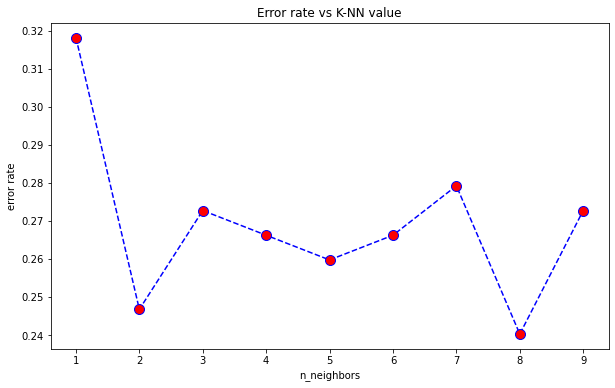

In [354]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K-NN value')
plt.xlabel('n_neighbors')
plt.ylabel('error rate')
print('Error Mínimo: ', min(error_rate), 'en n_neighbor: ', error_rate.index(min(error_rate))+1)
error_knn_pima = min(error_rate)

Es sencillo concluir gracias a la gráfica que el vecino que nos ofrece una mayor precisión de los resultados es k = 5, como sabemos, es preferible escoger un numero de vecinos impar, para tratar de reducir al máximo la variedad en los resultados provocados por elecciones aleatorias.

### K-NN para wdbc:

Se repite el mismo proceso de antes:

['M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B'
 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M'
 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B'
 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B'
 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M'
 'B' 'B' 'B' 'B' 'B' 'B']
Precisión: 0.9298245614035088
[[65  2]
 [ 6 41]]
              precision    recall  f1-score   support

           B       0.92      0.97      0.94        67
           M       0.95      0.87      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114

Error Mínimo:  0.07017543859649122 en n_neighbor:  5


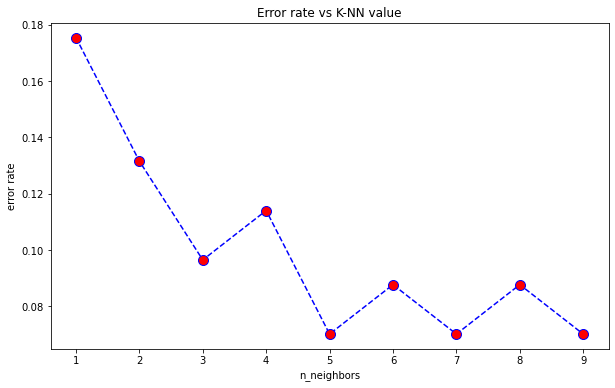

In [357]:
X = dataset2[['Atributo1','Atributo2','Atributo3','Atributo4','Atributo5','Atributo6','Atributo7','Atributo8','Atributo9','Atributo10','Atributo11','Atributo12','Atributo13','Atributo14','Atributo15'
              ,'Atributo16','Atributo17','Atributo18','Atributo19','Atributo20','Atributo21','Atributo22','Atributo23','Atributo24','Atributo25','Atributo26','Atributo27','Atributo28','Atributo29','Atributo30']].values
y = dataset2[['Class']].values.ravel()

# Se divide en train y set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(y_pred)

acc = knn.score(X_test, y_test)

print('Precisión:', acc)

print(confusion_matrix(y_test, y_pred))
#Se refiere a:

# | Verdaderos Positivos | Falsos negativos     |
# | Falsos Positivos     | Verdaderos Negativos |

# Ideal es que falsos positivos y negativos sean 0 (aunque un modelo casi nunca será 100% preciso)

print(classification_report(y_test, y_pred))

error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K-NN value')
plt.xlabel('n_neighbors')
plt.ylabel('error rate')
print('Error Mínimo: ', min(error_rate), 'en n_neighbor: ', error_rate.index(min(error_rate))+1)
error_knn_wdbc = min(error_rate)

En este caso, el valor de k óptimo serían 5,7,9...

### K-Means para iris:

In [358]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SL      150 non-null    float64
 1   SW      150 non-null    float64
 2   PL      150 non-null    float64
 3   PW      150 non-null    float64
 4   Class   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [359]:
dataset3.head()

,SL,SW,PL,PW,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Miro los valores descriptivos:

In [360]:
dataset3.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Normalizamos los valores y los guardamos en una nueva variable:

In [361]:
dataset3_variable = dataset3.drop(['Class'], axis=1)
dataset3_variable = dataset3_variable.astype('float64', copy=True)
dataset3_norm = (dataset3_variable-dataset3_variable.min())/(dataset3_variable.max()-dataset3_variable.min())
print(dataset3_norm)

           SL        SW        PL        PW
0    0.222222  0.625000  0.067797  0.041667
1    0.166667  0.416667  0.067797  0.041667
2    0.111111  0.500000  0.050847  0.041667
3    0.083333  0.458333  0.084746  0.041667
4    0.194444  0.666667  0.067797  0.041667
..        ...       ...       ...       ...
145  0.666667  0.416667  0.711864  0.916667
146  0.555556  0.208333  0.677966  0.750000
147  0.611111  0.416667  0.711864  0.791667
148  0.527778  0.583333  0.745763  0.916667
149  0.444444  0.416667  0.694915  0.708333

[150 rows x 4 columns]


Valores descriptivos normalizados:

In [362]:
dataset3_norm.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


Búsqueda de la cantidad óptima de clusters:
(Calculamos que tan parecidos son los individuos dentro de los clusters)

In [363]:
wcss = [] #Suma de los cuadrados

for i in range(1,5):
    kmeans = sk.cluster.KMeans(n_clusters= i, max_iter = 300)
    kmeans.fit(dataset3_norm)
    wcss.append(kmeans.inertia_)

C:\Users\ruben\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Gráfico de Codo Jambú, el cual utilizamos para saber cual es el número de clusters óptimo, este es el punto en el que deja de disminuir drásticamente:

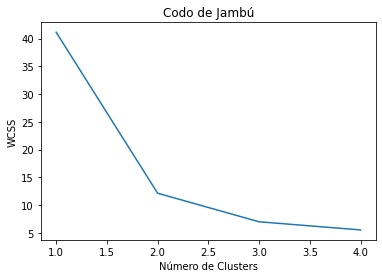

In [364]:
plt.plot(range(1,5),wcss)
plt.title("Codo de Jambú")
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

En nuestro caso, vemos que a partir de 3, la gráfica toma una pendiente menos pronunicada. Por lo tanto concluimos que 3 es el número optimo de clusters.

#### Aplico K-Means a la base de datos

In [365]:
clustering = sk.cluster.KMeans(n_clusters=3, max_iter = 300) #Crea el modelo
clustering.fit(dataset3_norm) #Aplica el modelo a la base de datos

KMeans(n_clusters=3)

Agrego la clasificación al archivo original:

In [367]:
dataset3['KMeans_Clusters'] = clustering.labels_ #Los resultados del clustering se guardan en labels_ dentro del modelo


#### Clusters formados:
(Aplicaremos el análisis de componentes principales)

In [369]:
pca = PCA(n_components=2)
pca_iris = pca.fit_transform(dataset3_norm)
pca_iris_df = pd.DataFrame(data = pca_iris, columns = ['Componente_1','Componente_2'])
pca_ir = pd.concat([pca_iris_df, dataset3[['KMeans_Clusters']]], axis=1)

print(pca_ir)

     Componente_1  Componente_2  KMeans_Clusters
0       -0.630361      0.111556                1
1       -0.623546     -0.100313                1
2       -0.669793     -0.047220                1
3       -0.654633     -0.098791                1
4       -0.648263      0.137558                1
..            ...           ...              ...
145      0.551755      0.058990                2
146      0.406278     -0.172227                0
147      0.447293      0.036996                2
148      0.489218      0.149121                2
149      0.312079     -0.031151                0

[150 rows x 3 columns]


Creo la gráfica:

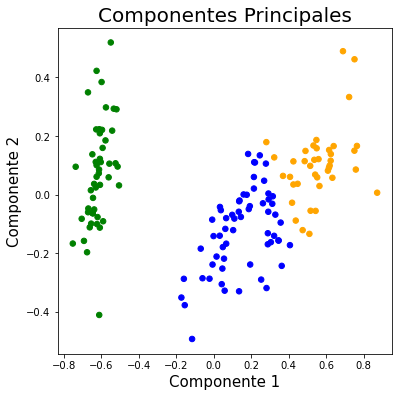

In [370]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)

color_theme = np.array(["blue","green","orange"])
ax.scatter(x=pca_ir.Componente_1, y=pca_ir.Componente_2, c=color_theme[pca_ir.KMeans_Clusters], s=30)

plt.show()

### Comparación de nuestros algoritmos y Scikit-learn:

Estos eran los errores para pima-indians-diabetes con nuestro algoritmo:

In [371]:
print('Para K = 1:')
print('Error para pima-indians-diabetes k=1: ' + err_diabetes_k1)
print('Error para pima-indians-diabetes k=1 normalizado: ' + err_diabetes_k1_norm)
print('\nPara K = 3:')
print('Error para pima-indians-diabetes k=3: ' + err_diabetes_k3)
print('Error para pima-indians-diabetes k=3 normalizado: ' + err_diabetes_k3_norm)
print('\nError para K = 5:')
print('Error para pima-indians-diabetes k=5: ' + err_diabetes_k5)
print('Error para pima-indians-diabetes k=5 normalizado: ' + err_diabetes_k5_norm)

Para K = 1:
Error para pima-indians-diabetes k=1: 31.05%
Error para pima-indians-diabetes k=1 normalizado: 28.68%

Para K = 3:
Error para pima-indians-diabetes k=3: 28.68%
Error para pima-indians-diabetes k=3 normalizado: 25.53%

Error para K = 5:
Error para pima-indians-diabetes k=5: 27.28%
Error para pima-indians-diabetes k=5 normalizado: 24.91%


Error para pima-indians-diabetes con Scikit-learn:

In [372]:
print('Error de KNN de SK en pima-indians-diabetes: ', f'{error_knn_pima*100:.2f}', '%')

Error de KNN de SK en pima-indians-diabetes:  24.03 %


 - Si comparamos el error mínimo de Scikit-learn con nuestro error se puede observar una diferencia pero no es extremadamente grande, esto se debe a que la implementacion de la librería a diferencia de la práctica anterior, no difiere en gran medida de la implementación que hemos realizado nosotros. 

Estos eran los errores para wdbc con nuestro algoritmo:

In [373]:
print('Para K = 1:')
print('Error para wdbc k=1: ' + err_wdbc_k1)
print('Error para wdbc k=1 normalizado: ' + err_wdbc_k1_norm)
print('\nPara K = 3:')
print('Error para wdbc k=3: ' + err_wdbc_k3)
print('Error para wdbc k=3 normalizado: ' + err_wdbc_k3_norm)
print('\nError para K = 5:')
print('Error para wdbc k=5: ' + err_wdbc_k5)
print('Error para wdbc k=5 normalizado: ' + err_wdbc_k5_norm)

Para K = 1:
Error para wdbc k=1: 7.86%
Error para wdbc k=1 normalizado: 5.60%

Para K = 3:
Error para wdbc k=3: 5.48%
Error para wdbc k=3 normalizado: 3.57%

Error para K = 5:
Error para wdbc k=5: 6.07%
Error para wdbc k=5 normalizado: 2.74%


Error para wdbc con Scikit-learn:

In [374]:
print('Error de KNN de SK en wdbc: ', f'{error_knn_wdbc*100:.2f}', '%')

Error de KNN de SK en wdbc:  7.02 %


- En el caso de wdbc sucede algo parecido. Los porcentajes rondan valores muy similares. 

Comparación de Kmeans con iris:

Error para iris con Scikit-learn:

- El error obtenido con Scikit-learn, como se puede apreciar en el gráfico creado, está normalmente cerca del 1%, porcentaje similar al que logramos con nuestra implementacion.

### Conclusión:

Aunque no hayamos obtenido una eficiencia similar a Scikit-learn si hemos logrado desarrollar unos valores de error muy similares a la librería.
A modo de aporte comentar, que hemos desarrollado K-means de dos formas diferentes, aunque tras la aclaración del profesor hemos decidido decantarnos por una de ella, pero es interesante plantear que existen alternativas en el recalculo de los centroides calculando el centro de masas y a partir de este vector buscar el patrón que se encuentre más cerca de este centro de masas. Actualmente nosotros hemos implementado K-Means con el cálculo de centro de masas pero sin buscar el patron más cercano, sino calculando la distancia directamente sobre este vector medio